# Importance Sampling

## variance

https://en.wikipedia.org/wiki/Variance $\def\E{\mathbb{E}}
\def\Var{\mathrm{Var}}
\def\Cov{\mathrm{Cov}}$

"The variance of a random variable $X$ is the expected value of the squared deviation from the mean of $X$, $\mu = \E[X]$:

$$
\Var(X) = \E[(X - \mu)^2]
$$

"This definition encompasses random variables that are generated by processes that are discrete, continuous, neither, or mixed. The variance can also be thought of as the covariance of a random variable with itself:

$$
\Var(X) = \Cov(X, X)
$$

"The variance is also equivalent to the second cumulant of a probability distribution that generates $X$. The variance is typically designated as $\Var(X)$, $\sigma^2_X$, or simply $\sigma^2$. The expression for the variance can be expanded:

$$
\Var(X) = \E[(X - \E[X])^2] \\
= \E[X^2 - 2X\E[X] + \E[X]^2] \\
= \E[X^2] - 2\E[X]\E[X] + \E[X]^2 \\
=\E[X^2] - \E[X]^2
$$

__Continuous random variable__

"If the random variable $X$ represents samples generated by a continuous distribution with probability density function $f(x)$, then the population variance is given by:

$$
\Var(X) = \sigma^2 = \int (x - \mu)^2\, f(x) \, dx
$$

$$
=\int \left(
    x^2 - 2x\mu + \mu^2
\right)\, f(x) \, dx
$$

$$
=\int x^2 f(x)\, dx
- 2\mu \int x\, f(x)\, dx
+ \mu^2 \int f(x)\, dx
$$

And we have:

$$
\mu = \int x \,f(x)\,dx
$$

And therefore:

$$
\Var(x) = \int x^2\,f(x)\,dx - \mu^2
$$

ie, it's:

$$
\Var(x) = \E_f[x^2] - \mu^2
$$

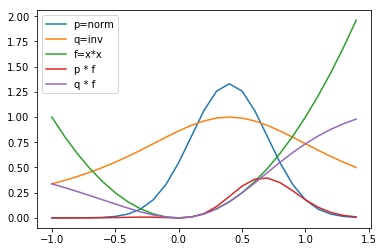

In [1]:
import numpy as np
import matplotlib.pyplot as plt


mu = 0.4
std = 0.3
var = std * std


X = np.arange(-1.0, 1.5, 0.1)
plt.plot(X, 1 / np.sqrt(2 * np.pi * var) * np.exp(- (X - mu) * (X - mu) / 2 / var), label='p=norm')
plt.plot(X, 1 / (1 + (X - mu) * (X - mu)), label='q=inv')
plt.plot(X, X*X, label='f=x*x')
plt.plot(X, X*X * 1 / np.sqrt(2 * np.pi * var) * np.exp(- (X - mu) * (X - mu) / 2 / var), label='p * f')
plt.plot(X, X*X * 1 / (1 + (X - mu) * (X - mu)), label='q * f')
plt.legend()
plt.show()


$$
q(x) = \frac{1}{1 + (x-\mu)^2}
$$

$$
\frac{dq}{dx} = d/dx((1 + (x-\mu)^2)^{-1})
$$

$$
= (-1)(1 + (x-\mu)^2)(2(x-\mu))
$$

$$
=-2(1+(x-\mu)^2)(x-\mu)
$$

$$
=-2(x - \mu + (x-\mu)^3)
$$

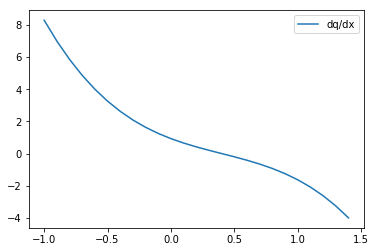

In [2]:
plt.plot(X, -2 * (X - mu + (X - mu) * (X -mu) * (X-mu)), label='dq/dx')
plt.legend()
plt.show()

$dq/dx = 0$ at:

- $x=\mu$

$$
\int_{-\infty}^t q \, dx
= \int_{-\infty}^t \frac{1}{1 + (x-\mu)^2}\,dx
$$

$$
= \int_{-\infty}^t \frac{1}{1 + x^2 - 2x\mu + \mu^2)} \, dx
$$

$$
= \int_{-\infty}^t \frac{1}{1 + \mu^2 - 2\mu x + x^2} \, dx
$$

from http://tutorial.math.lamar.edu/Classes/CalcII/PartialFractions.aspx

$$
\frac{3x + 11}
   {x^2 - x - 6} \\
= \frac{3x + 11}
   {(x - 3)(x + 2)}
$$

$$
= \frac{3x}{(x-3)(x+2)} + \frac{11}{(x-3)(x+2)}
$$

$$
=\frac{(-1)(x-3) + (4)(x+2)}
  {(x-3)(x+2)} \\
=-\frac{1}{x+2} + \frac{4}{x-3}
$$

So, for earlier:

$$
1 + \mu^2 - 2\mu x + x^2
$$

$$
\frac{1 + (x-\mu)^2 - (x-\mu)^2}
  {1 + (x - \mu)^2}
$$

$$
= 1 - \frac{(x-\mu)^2}{1 + (x-\mu)^2}
$$

Substitute $u = (x - \mu)$

So, $du = dx$

Then:
    
$$
\int
\frac{1}
  {1 + (x-\mu)^2}\,dx \\
= \int
   \frac{1}{1 + u^2} \, du
$$

We have:

$$
\int \frac{1}{x^2+a^2}\, dx \\
= \frac{1}{a} \tan^{-1}\left(
    \frac{x}{a}
\right) + c
$$

Therefore our integral is:

$$
\int \frac{1}{1+u^2} du \\
= \frac{1}{1}\tan^{-1}(u) + c
$$


And:

$$
\int_{-\infty}^t \frac{1}{1+u^2}\,du \\
= \tan^{-1}(t) - \tan^{-1}(-\infty)
$$

-1.57079631679
1.57079631679
-1.57079632679
0.0
1.57079632679


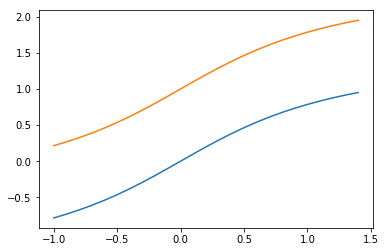

In [3]:
import numpy as np
import math

print(np.arctan(-100000000))
print(np.arctan(100000000))
print(np.arctan(-1e12))
print(np.arctan(0))
print(np.arctan(1e12))

plt.plot(X, np.arctan(X), label='arctan')
plt.plot(X, np.arctan(X) + 1, label='arctan + 1')
plt.show()

=> means we should normalize q, in fact, by dividing by $\pi$

From here on, let's use:

$$
q(x) = \frac{1}{\pi(1 + (x-\mu)^2)}
$$

So:

$$
cdf(q(x)) = \frac{1}{\pi}( \tan^{-1}(t) + \pi/2)
$$

$$
= \frac{1}{\pi}(\tan^{-1}(x - \mu) + \pi/2)
$$

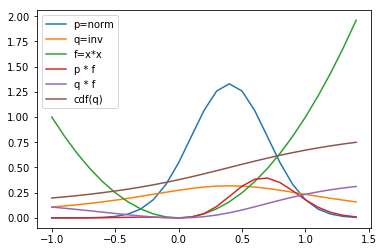

In [4]:
import numpy as np
import matplotlib.pyplot as plt


mu = 0.4
std = 0.3
var = std * std


X = np.arange(-1.0, 1.5, 0.1)
plt.plot(X, 1 / np.sqrt(2 * np.pi * var) * np.exp(- (X - mu) * (X - mu) / 2 / var), label='p=norm')
plt.plot(X, 1 / np.pi / (1 + (X - mu) * (X - mu)), label='q=inv')
plt.plot(X, X*X, label='f=x*x')
plt.plot(X, X*X * 1 / np.sqrt(2 * np.pi * var) * np.exp(- (X - mu) * (X - mu) / 2 / var), label='p * f')
plt.plot(X, X*X * 1 / np.pi / (1 + (X - mu) * (X - mu)), label='q * f')
plt.plot(X, 1 / np.pi * (np.arctan(X - mu) + np.pi / 2), label='cdf(q)')
plt.legend()
plt.show()


To sample from $q$, we can sample from uniform $[0,1]$, and then apply inverse of the cdf. Let's call $g = cdf(q(x))$.

We have:

$$
g = \frac{1}{\pi}(\tan^{-1}(x-\mu) + \pi/2)
$$

So,

$$
\tan^{-1}(x-\mu) = \pi g - \pi/2
$$

Therefore:

$$
x-\mu = \tan(\pi g - \pi/2)
$$

And:

$$
x = \mu + \tan(\pi g - \pi/2)
$$

uniform range 9.10281567457e-07 0.999972768381
q_samples range -349682.486653 11689.3811574


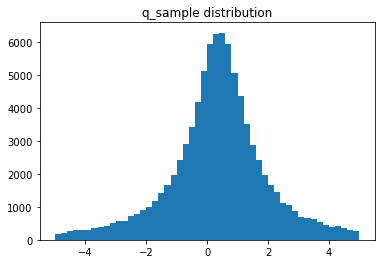

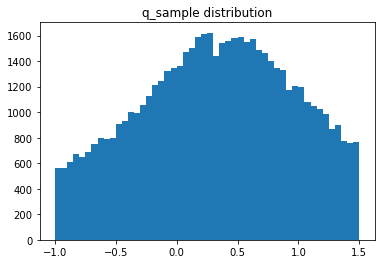

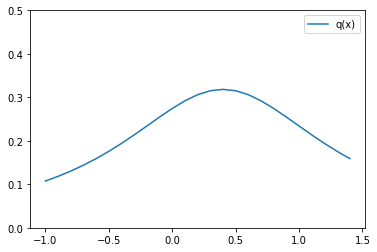

In [6]:
N = 100000

r = np.random.RandomState(123)
# help(r.uniform)
# samples = r.rand(N)
uniform_samples = r.uniform(size=N)
print('uniform range', min(uniform_samples), max(uniform_samples))
# print(samples)

q_samples = mu + np.tan(np.pi * uniform_samples - np.pi / 2)
print('q_samples range', min(q_samples), max(q_samples))
# print(x_samples)

plt.hist(q_samples, bins=50, range=[-5.0, 5.0])
plt.title('q_sample distribution')
plt.show()

plt.hist(q_samples, bins=50, range=[-1.0, 1.5])
plt.title('q_sample distribution')
plt.show()

plt.plot(X, 1 / np.pi * (1/(1 + (X - mu) * (X - mu))), label='q(x)')
plt.ylim([0, 0.5])
plt.legend()
plt.show()

Try sampling from $fq$:

uniform_samples range 6.78383122751e-05 0.999890064546
q_samples range -4691.78455898 2895.82510575
-5.3712452503 -0.882960504842


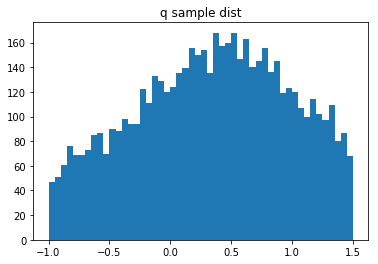

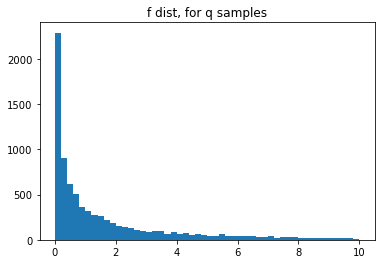

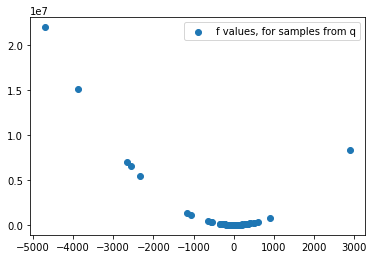

In [9]:
N = 10000

r = np.random.RandomState(123)
# help(r.uniform)
uniform_samples = r.uniform(size=N)
print('uniform_samples range', min(uniform_samples), max(uniform_samples))
# print(samples)

q_samples = mu + np.tan(np.pi * uniform_samples - np.pi / 2)
f_of_samples = q_samples * q_samples
print('q_samples range', min(q_samples), max(q_samples))
print(np.tan(min(q_samples)), np.tan(max(q_samples)))

plt.hist(q_samples, bins=50, range=[-1.0, 1.5])
plt.title('q sample dist')
plt.show()

plt.hist(f_of_samples, bins=50, range=[0.0, 10.0])
plt.title('f dist, for q samples')
plt.show()

plt.scatter(q_samples, f_of_samples, label='f values, for samples from q')
plt.legend()
plt.show()

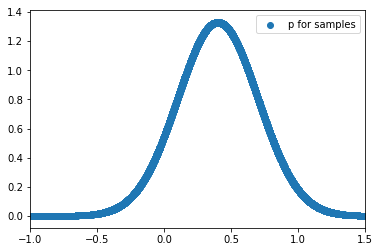

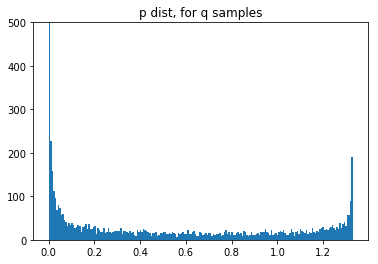

In [14]:
# x_samples = mu + np.tan(np.pi * samples - np.pi / 2)
p_for_samples = 1 / np.sqrt(2 * np.pi * var) * np.exp(-(q_samples - mu) * (q_samples - mu) / 2 / var)

plt.scatter(q_samples, p_for_samples, label='p for samples')
plt.xlim([-1.0, 1.5])
plt.legend()
plt.show()

plt.hist(p_for_samples, bins=200)
plt.ylim([0, 500])
plt.title('p dist, for q samples')
plt.show()

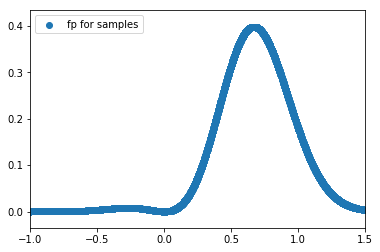

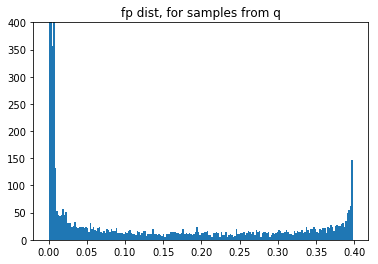

In [16]:
fp_of_samples = f_of_samples * p_for_samples

plt.scatter(q_samples, fp_of_samples, label='fp for samples')
plt.xlim([-1.0, 1.5])
plt.legend()
plt.show()

# plt.hist(fp, bins=50, range=[-1.0, 1.5])
plt.hist(fp_of_samples, bins=200)
plt.ylim([0, 400])
plt.title('fp dist, for samples from q')
plt.show()


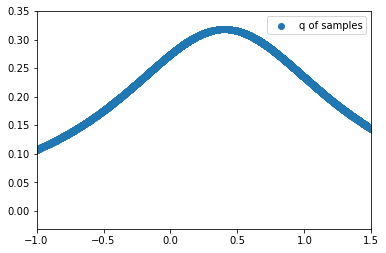

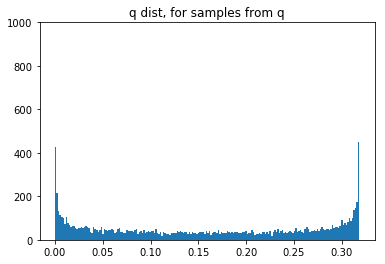

In [18]:
q_of_samples = 1 / np.pi / (1 + (q_samples - mu) * (q_samples - mu))

plt.scatter(q_samples, q_of_samples, label='q of samples')
plt.xlim([-1.0, 1.5])
plt.legend()
plt.show()

plt.hist(q_of_samples, bins=200)
plt.ylim([0, 1000])
plt.title('q dist, for samples from q')
plt.show()

In [20]:
expected_f_under_q = np.mean(f_of_samples)
print('expected_f_under_q', expected_f_under_q)

expected_f_under_p = np.mean(fp_of_samples / q_of_samples)
print('expected_f_under_p', expected_f_under_p)


expected_f_under_q 7244.16826953
expected_f_under_p 0.255039563236


## Try actually sampling from the gaussian, compare results

In [22]:
r2 = np.random.RandomState(123)
p_samples = r2.normal(size=N) * std + mu
print('mean(p_samples)', np.mean(p_samples))
print('var(p_samples)', np.var(p_samples))

f_for_p_samples = p_samples * p_samples
print('mean(f of p samples)', np.mean(f_for_p_samples))
print('var(f of p samples)', np.var(f_for_p_samples))

mean(p_samples) 0.402913567687
var(p_samples) 0.0896608140052
mean(f of p samples) 0.252000157032
var(f of p samples) 0.0742539778836


expectations of f under p match those using samples from q. Yay :)

Variance...

In [26]:
print('variance of f for q samples', np.var(f_of_samples))
print('variance of fp for q samples', np.var(fp_of_samples))
print('variance of fp/q for q samples', np.var(fp_of_samples / q_of_samples))

variance of f for q samples 90900732920.2
variance of fp for q samples 0.0156876262734
variance of fp/q for q samples 0.186934418827


## zero variance...

we want to sample from $q = fp/\mu$

Let's try rejection sampling. We can see that $fp$ is no greater than about $0.4$, so let's use $0.6$ as an upperbound.

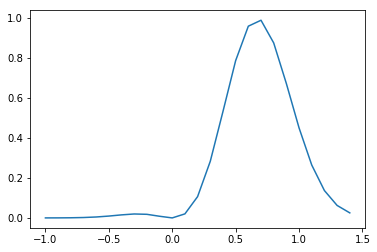

In [48]:
def calc_fpmu(x):
    f = x * x
    p = 1 / np.sqrt(2 * np.pi * var) * np.exp(- 0.5 / var * (x - mu) * (x-mu))
#     return p
    return f * p / mu


plt.plot(X, calc_fpmu(X), label='fp/mu')
plt.show()



Let's bound this by 1.5, and use the earlier q as the sampling distribution. $q$ has its mode above $0.3$, so let's use $4q$ as the proposal distribution.

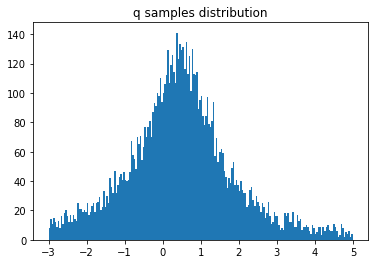

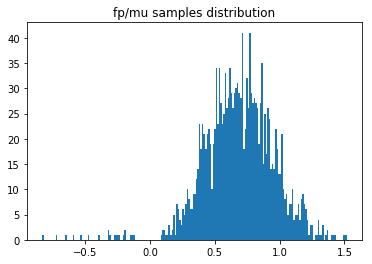

In [50]:
# we can just reuse the q samples from earlier

def calc_q(x):
    return 1 / np.pi / (1 + (x - mu) * (x-mu))

accepted = []
for i, x in enumerate(q_samples):
    q = calc_q(x)
    fpmu = calc_fpmu(x)
    u = np.random.uniform()
#     print('q', q, 'fpmu', fpmu, 'u', u)
    if u <= fpmu / q / 4:
        accepted.append(x)

plt.hist(q_samples, bins=200, range=[-3, 5])
plt.title('q samples distribution')
plt.show()

plt.hist(accepted, bins=200)
plt.title('fp/mu samples distribution')
plt.show()
#     f = x * x
#     print('x', x)
#     if i > 3:
#         break

Let's evaluate $fp/q$ at each point, so it's:

$$
\frac{fp}{q} = \frac{fp\mu}{fp} = \mu
$$